In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/110-1-ntut-ee-ai-hw1/pred_results.csv
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
# Read the Fashion MNIST data from local CSV file

df_train = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")
df_test = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv")
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Get train images and labels from CSV file

train_images = np.array(df_train.drop(["label"], axis=1))
train_labels = np.array(df_train["label"])
test_images = np.array(df_test.drop(["label"], axis=1))

In [4]:
# We have 60,000 training samples, each vecotr has 784 pixels (28*28)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
test_images.shape
train_images.shape

(60000, 28, 28, 1)

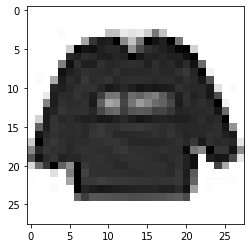

In [5]:
# Display training data with pyplot. Remember to reshape the image vector

import matplotlib.pyplot as plt
plt.imshow(np.reshape(train_images[0], (28,28)), cmap=plt.cm.binary)
plt.show()

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D,Activation,BatchNormalization
network = models.Sequential()
network.add(Conv2D(32, (3, 3), padding="same",input_shape=(28 , 28,1)))
network.add(Activation("relu"))
network.add(Conv2D(32, (3, 3), padding="same"))
network.add(Activation("relu"))
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(BatchNormalization())
network.add(Dropout(0.3))
network.add(Conv2D(64, (3, 3), padding="same",input_shape=(28 , 28,1)))
network.add(Activation("relu"))
network.add(Conv2D(64, (3, 3), padding="same"))
network.add(Activation("relu"))
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(BatchNormalization())
network.add(Dropout(0.3))
network.add(Conv2D(128, (3, 3), padding="same"))
network.add(Activation("relu"))
network.add(Conv2D(128, (3, 3), padding="same"))
network.add(Activation("relu"))
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(BatchNormalization())
network.add(Dropout(0.3))
network.add(Conv2D(256, (3, 3), padding="same"))
network.add(Activation("relu"))
network.add(Conv2D(256, (3, 3), padding="same"))
network.add(Activation("relu"))
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(BatchNormalization())
network.add(Dropout(0.4))
network.add(Flatten())
network.add(Dense(512))
network.add(BatchNormalization())
network.add(Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))
network.summary()


2022-11-24 09:11:30.962656: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-11-24 09:11:35.421165: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-24 09:11:35.425028: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-24 09:11:35.489810: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 09:11:35.490521: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-11-24 09:11:35.490571: I tensorflow/stream_executor/platform/def

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0

In [7]:
network.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [8]:
# Normalize the training images
trn_images = train_images.astype('float32') / 255
tst_images = test_images.astype('float32') / 255

In [9]:
from tensorflow.keras.utils import to_categorical
trn_labels = to_categorical(train_labels)


In [10]:
network.fit(trn_images, trn_labels, epochs=70, batch_size=128)
#60  128 has best 


2022-11-24 09:11:38.205602: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-11-24 09:11:38.217572: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000179999 Hz


Epoch 1/70


2022-11-24 09:11:39.989929: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-11-24 09:11:41.005324: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-11-24 09:11:41.034535: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


469/469 [==============================] - 14s 11ms/step - loss: 0.8956 - accuracy: 0.7124
Epoch 2/70
469/469 [==============================] - 5s 11ms/step - loss: 0.3551 - accuracy: 0.8756
Epoch 3/70
469/469 [==============================] - 5s 11ms/step - loss: 0.2828 - accuracy: 0.8972
Epoch 4/70
469/469 [==============================] - 5s 11ms/step - loss: 0.2506 - accuracy: 0.9089
Epoch 5/70
469/469 [==============================] - 5s 11ms/step - loss: 0.2299 - accuracy: 0.9185
Epoch 6/70
469/469 [==============================] - 5s 11ms/step - loss: 0.2183 - accuracy: 0.9227
Epoch 7/70
469/469 [==============================] - 5s 11ms/step - loss: 0.2034 - accuracy: 0.9281
Epoch 8/70
469/469 [==============================] - 5s 11ms/step - loss: 0.1888 - accuracy: 0.9323
Epoch 9/70
469/469 [==============================] - 5s 11ms/step - loss: 0.1860 - accuracy: 0.9330
Epoch 10/70
469/469 [==============================] - 5s 11ms/step - loss: 0.1766 - accuracy: 0.9370

In [11]:
# Prdict the class of each test image
#results = network.predict_classes(tst_images)
results = np.argmax(network.predict(tst_images), axis=-1)

In [12]:
# Print results in CSV format for uploading to Kaggle
with open('pred_results.csv', 'w') as f:
    f.write('Id,Category\n')
    for i in range(len(results)):
        f.write(str(i) + ',' + str(results[i]) + '\n')

In [13]:
# Upload your results to Kaggle
from IPython.display import FileLink
FileLink('pred_results.csv')

/kaggle/working/pred_results.csv